**CII4Q3 Visi Komputer**

---



#Exercise 5: Fruit classification (10 Class)

---

<p>Nama  = Reynhard Powiwi - Muhammad Fadhil Fadhlurrahman </p>
<p>NIM   = 1301204091 - 1301204439 </p>
<p>Kelas = IF-44-PIL-IS01 📚👨‍🎓</p>

---

Lakukan klasifikasi  Fruit classification(10 Class), dari dataset ini https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class



# **Imports**

Import library yang dibutuhkan

In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from google.colab import files
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
from keras.preprocessing import image
from keras import Sequential
import glob as gb


Memasukan token api dari kaggle sehingga dapat langsung mendownload dataset dari kaggle

In [2]:
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d karimabdulnabi/fruit-classification10-class

zip_ref = zipfile.ZipFile('fruit-classification10-class.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 86% 25.0M/29.2M [00:01<00:00, 33.2MB/s]
100% 29.2M/29.2M [00:01<00:00, 23.3MB/s]


Melihat nama file yang sudah didownload dari kaggle

In [3]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/fruit-classification10-class.zip
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/logs/2023.11.21/14.21.40.489438.log
/content/.config/logs/2023.11.21/14.18.34.556141.log
/content/.config/logs/2023.11.21/14.24.29.745469.log
/content/.config/logs/2023.11.21/14.21.30.762319.log
/content/.config/logs/2023.11.21/14.24.40.484653.log
/content/.config/logs/2023.11.21/14.24.39.684965.log
/content/.config/configurations/config_default
/content/MY_data/predict/65.jpeg
/content/MY_data/predict/66.jpeg
/content/MY_data/predict/f7.jpeg
/content/MY_data/predict/0122.jpeg
/content/MY_data/predict/33.jpeg
/content/MY_data/predict/img_241.jpeg
/content/MY_data/predict/img_301.jpeg
/content/MY_data/predict/img_361.jpeg
/content/MY_data/predict/4.jpeg
/content/MY_data/predict/img_401.j

# Preprocessing Data

Menetapkan jalur direktori untuk data latih (trainpath), data uji (testpath), dan data yang akan diprediksi (predpath). Selanjutnya, kode mencetak panjang (jumlah karakter) dari masing-masing path.

In [4]:
trainpath = "/content/MY_data/train/"
testpath = "/content/MY_data/test/"
predpath = "/content/MY_data/predict/"

print(len(trainpath))
print(len(testpath))
print(len(predpath))

23
22
25


Kemudian kita akan mengecek training, testing, dan prediction datanya untuk setiap kelas

In [5]:
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 230 in folder cherry
for training data , found 230 in folder watermelon
for training data , found 230 in folder kiwi
for training data , found 231 in folder mango
for training data , found 230 in folder strawberries
for training data , found 230 in folder orange
for training data , found 230 in folder pinenapple
for training data , found 230 in folder avocado
for training data , found 230 in folder Apple
for training data , found 230 in folder Banana


In [6]:
for folder in os.listdir(testpath):
    files = gb.glob(pathname=str(testpath+folder + "/*.jpeg"))
    print(f"for training data , found {len(files)} in folder {folder}")

for training data , found 105 in folder cherry
for training data , found 105 in folder watermelon
for training data , found 105 in folder kiwi
for training data , found 105 in folder mango
for training data , found 97 in folder orange
for training data , found 105 in folder pinenapple
for training data , found 105 in folder avocado
for training data , found 89 in folder apple
for training data , found 103 in folder stawberries
for training data , found 106 in folder banana


In [7]:
files = gb.glob(pathname=str(predpath+"/*.jpeg"))
print(len(files))

48


In [8]:
classes=sorted(os.listdir(trainpath))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:Banana,2:avocado,3:cherry,4:kiwi,5:mango,6:orange,7:pinenapple,8:strawberries,9:watermelon'

kemudian masuk ke bagian dari pembuatan generator data untuk melatih, memvalidasi, dan menguji model klasifikasi menggunakan TensorFlow dan Keras. Proses ini melibatkan augmentasi data untuk data latih (melalui train_datagen) dan data uji (testing_datagen). Augmentasi data adalah teknik yang melibatkan variasi data pelatihan dengan melakukan transformasi seperti rotasi, pembelokan, dan zoom untuk meningkatkan variasi dan generalisasi model.

In [9]:
TRAINING_DIR = trainpath
TESTING_DIR = testpath

train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )


testing_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)


validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    classes=classes,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

testing_generator = train_datagen.flow_from_directory(
    TESTING_DIR,
    classes=list(map(lambda x:x.lower().replace("strawberries","stawberries"),classes)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)



Found 1841 images belonging to 10 classes.
Found 460 images belonging to 10 classes.
Found 1025 images belonging to 10 classes.


Dengan menggunakan generator ini, data dapat diambil secara otomatis dalam batch-batch selama proses pelatihan dan evaluasi model. Augmentasi data pada data latih membantu meningkatkan kemampuan generalisasi model, dan normalisasi pada data uji memastikan data siap untuk diproses oleh model

# CNN Classification

In [10]:
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    #A good dose of augmentation so that training data is hard to memorize but not too much to make the learning difficult
    layers.RandomRotation(0.1,input_shape=(256,256,3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),

    #convolutional portion
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(64, 3,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Conv2D(128, 4,  activation='relu'),
    layers.MaxPooling2D(4),
    layers.Flatten(),

    #Dense portion, with high dropout rate for a high regualization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# add callbacks for early stopping and lr reduction during training
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [12]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=150,
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/150
29/29 [==============================] - 51s 1s/step - loss: 2.3030 - accuracy: 0.1146 - val_loss: 2.2612 - val_accuracy: 0.1609 - lr: 0.0010
Epoch 2/150
29/29 [==============================] - 39s 1s/step - loss: 2.2125 - accuracy: 0.1754 - val_loss: 2.0668 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/150
29/29 [==============================] - 39s 1s/step - loss: 2.0313 - accuracy: 0.2390 - val_loss: 1.7972 - val_accuracy: 0.2913 - lr: 0.0010
Epoch 4/150
29/29 [==============================] - 38s 1s/step - loss: 1.8494 - accuracy: 0.2743 - val_loss: 1.6337 - val_accuracy: 0.3370 - lr: 0.0010
Epoch 5/150
29/29 [==============================] - 37s 1s/step - loss: 1.7363 - accuracy: 0.3042 - val_loss: 1.5765 - val_accuracy: 0.3435 - lr: 0.0010
Epoch 6/150
29/29 [==============================] - 38s 1s/step - loss: 1.7179 - accuracy: 0.3199 - val_loss: 1.5454 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 7/150
29/29 [==============================] - 38s 1s/step - loss: 1.6

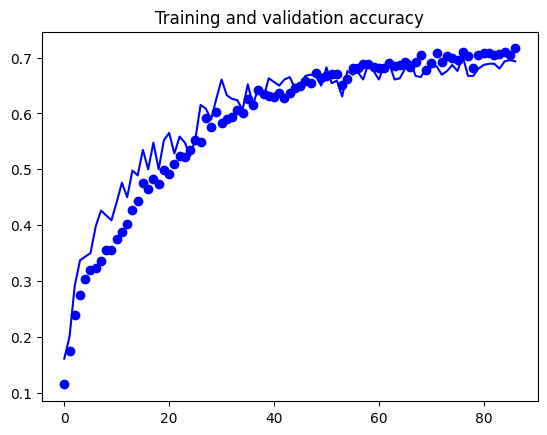

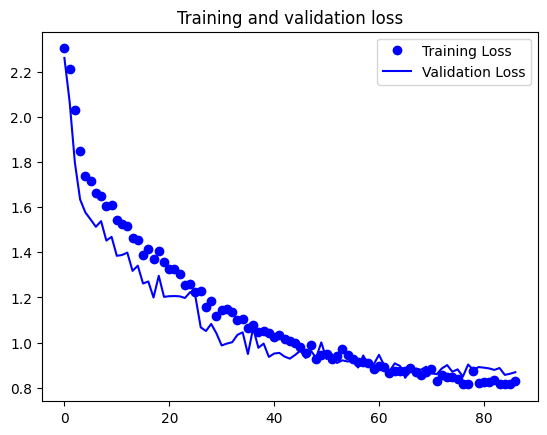

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Desired output. Charts with training and validation metrics. No crash :)

# Final evaluation

In [23]:
model.evaluate(testing_generator)

17/17 [==============================] - 16s 944ms/step - loss: 1.0660 - accuracy: 0.6546


[1.0659774541854858, 0.6546341180801392]

In [19]:
model.evaluate(validation_generator)

8/8 [==============================] - 7s 825ms/step - loss: 0.8625 - accuracy: 0.6826


[0.8625342845916748, 0.6826087236404419]